In [1]:
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory

import matplotlib.pyplot as plt
import seaborn.objects as so
import seaborn as sns
import numpy as np

2023-04-07 21:03:01.370645: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-07 21:03:02.217797: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Testing the number of GPU

In [2]:
print(f"Number of GPU: { len( tf.config.list_physical_devices('GPU'))}")

Number of GPU: 2


### Reading the DATA

In [3]:
w_dir = pathlib.Path('/home/antirrabia/Documents/DeepLearnin/DATASETS/CatsVsDogs/cats_vs_dogs_small/')

In [4]:
tr_d = image_dataset_from_directory(
    w_dir / 'train',
    image_size=(180,180),
    batch_size=32
)

va_d = image_dataset_from_directory(
    w_dir / 'validation',
    image_size=(180,180),
    batch_size=32
)

te_d = image_dataset_from_directory(
    w_dir / 'test',
    image_size=(180,180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


2023-04-07 21:03:18.631269: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2922 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 980, pci bus id: 0000:02:00.0, compute capability: 5.2
2023-04-07 21:03:18.632108: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 3284 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 980, pci bus id: 0000:03:00.0, compute capability: 5.2


### importing and freezing VGG16

In [5]:
conv_base = keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet'
)

# Freezing
conv_base.trainable = False

### Augmentation

In [6]:
data_augmentation = keras.Sequential( 
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)

### Model

In [7]:
inputs = keras.Input(shape=(180,180,3))

x = data_augmentation(inputs)

x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)

# our Classifier
x = layers.Flatten()(x)

x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

### Training

In [8]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='CatsVsDogsPreTrainedWithAugmentation.keras',
        monitor='val_loss',
        save_best_only=True
    )
]

history = model.fit(
    tr_d,
    epochs=52,
    validation_data=va_d,
    callbacks=callbacks
)

Epoch 1/52


2023-04-07 21:03:47.652935: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2000]
	 [[{{node Placeholder/_4}}]]
2023-04-07 21:03:47.653737: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2000]
	 [[{{node Placeholder/_4}}]]
2023-04-07 21:03:49.244570: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-04-07 21:03:50.321221: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.24GiB with freed_by_count=0. The caller indicates that thi

62/63 [============================>.] - ETA: 0s - loss: 17.6030 - accuracy: 0.8942

2023-04-07 21:04:00.941314: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.54GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


63/63 [==============================] - ETA: 0s - loss: 17.4789 - accuracy: 0.8945

2023-04-07 21:04:02.479949: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1000]
	 [[{{node Placeholder/_4}}]]
2023-04-07 21:04:02.481153: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1000]
	 [[{{node Placeholder/_0}}]]


63/63 [==============================] - 20s 224ms/step - loss: 17.4789 - accuracy: 0.8945 - val_loss: 3.0445 - val_accuracy: 0.9760
Epoch 2/52
63/63 [==============================] - 10s 165ms/step - loss: 8.2610 - accuracy: 0.9385 - val_loss: 6.0787 - val_accuracy: 0.9650
Epoch 3/52
63/63 [==============================] - 10s 165ms/step - loss: 4.7227 - accuracy: 0.9545 - val_loss: 4.3439 - val_accuracy: 0.9700
Epoch 4/52
63/63 [==============================] - 10s 166ms/step - loss: 4.7061 - accuracy: 0.9570 - val_loss: 3.1910 - val_accuracy: 0.9800
Epoch 5/52
63/63 [==============================] - 10s 166ms/step - loss: 2.8759 - accuracy: 0.9710 - val_loss: 6.4550 - val_accuracy: 0.9660
Epoch 6/52
63/63 [==============================] - 11s 168ms/step - loss: 3.1477 - accuracy: 0.9650 - val_loss: 3.4054 - val_accuracy: 0.9800
Epoch 7/52
63/63 [==============================] - 11s 173ms/step - loss: 3.2806 - accuracy: 0.9720 - val_loss: 2.5774 - val_accuracy: 0.9790
Epoch 8/5

### Seeing the training

Text(0.5, 1.0, 'Training and Validation Loss')

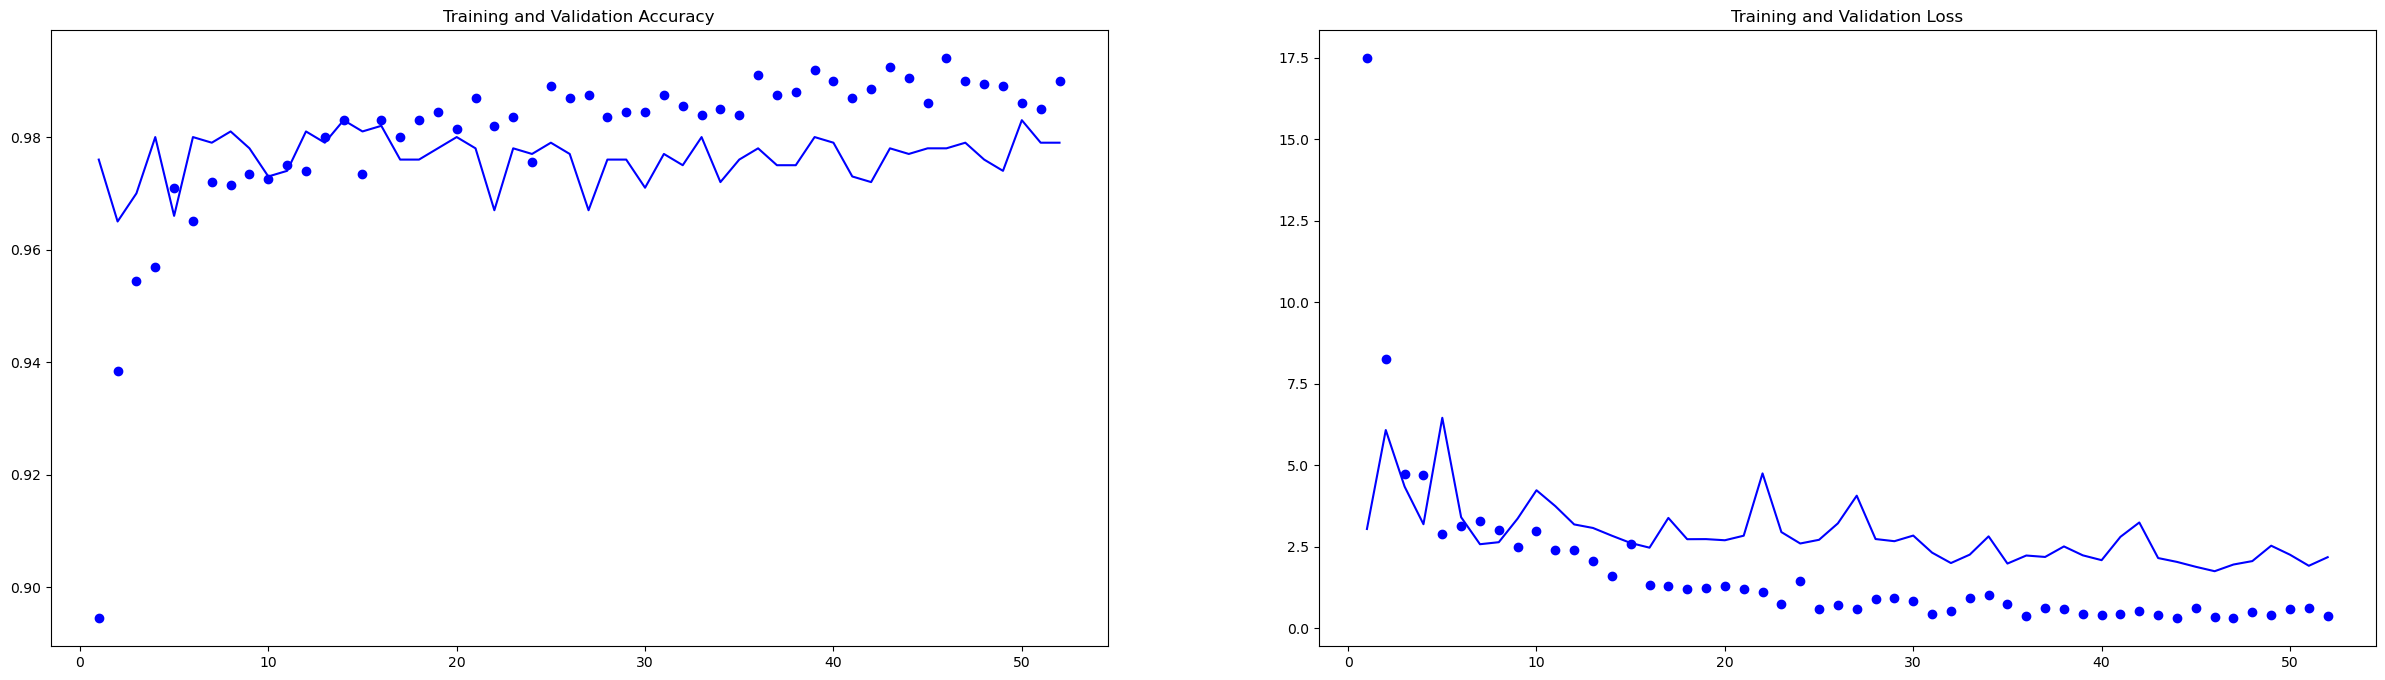

In [9]:
# Accuracy
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,8))

ax[0].plot(epochs, accuracy, 'ob', label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy')

ax[1].plot(epochs, loss, 'bo', label='Training Loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
ax[1].set_title('Training and Validation Loss')

